In [197]:
import os

import bk.load
import bk.compute
import bk.plot
import bk.signal

import numpy as np
import pandas as pd

import scipy.signal
import scipy.stats as ss
import scipy.io

import matplotlib.pyplot as plt
import matplotlib as mpl
import neuroseries as nts

from tqdm import tqdm

In [198]:
def poissonTest(baseRate,counts,time):
    eps = np.spacing(1)
    
    lam = baseRate*time
    
    pInc = 1 - ss.poisson.cdf(counts,lam)
    pDec = ss.poisson.cdf(counts,lam)
    surprise = np.log((pDec+eps)/(pInc + eps))
    return pInc,pDec,surprise

In [199]:
def load_ripples():
    ripples_ = scipy.io.loadmat(f'{bk.load.session}-RippleFiring.mat')['ripples']['allsws'][0][0]
#     ripples_ = pd.DataFrame(data = ripples,columns=['start','peak','stop'])
    
    columns = ['start','peak','stop']
    
    ripples = {}
    for i,c in zip(range(ripples_.shape[1]),columns):
        ripples.update({c:nts.Ts(ripples_[:,i],time_units='s')})
    return ripples

def ripple_psth(path):
    nbins = 100
    
    
    bk.load.current_session(path)
    ripples = load_ripples()
    neurons,metadata = bk.load.loadSpikeData(bk.load.path)

    win = [-0.5,0.5]
    n_neurons = len(neurons)
    
    peth = np.empty((len(ripples['peak'].as_units('s').index),nbins,n_neurons))
    
    for i,ripple_time in tqdm(enumerate(ripples['peak'].as_units('s').index)):
        t,binned = bk.compute.binSpikes(neurons,nbins=nbins,start = ripple_time+win[0],stop = ripple_time+win[1])
        peth[i,:] = binned.T
    
    
    states = bk.load.states()
    states.update({'ripples':nts.IntervalSet(ripples['start'].times(),ripples['stop'].times())})
    states.update({'outside_ripples':states['sws'].set_diff(nts.IntervalSet(states['ripples'].start-200_000,states['ripples'].end+200_000,force_no_fix=True))})
    
    pInc = np.empty(len(neurons))
    pDec = np.empty(len(neurons))
    surprise = np.empty(len(neurons))
    for i,n in enumerate(neurons):
        baseRate = len(n.restrict(states['outside_ripples']))/states['outside_ripples'].tot_length(time_units = 's')
        count = len(n.restrict(states['ripples']))
        time = states['ripples'].tot_length(time_units = 's')
        
        pInc[i],pDec[i],surprise[i] = poissonTest(baseRate,count,time)
    
    stats = pd.DataFrame(np.array([pInc,pDec,surprise]).T,columns=['pInc','pDec','surprise'])
    
    
    return t,peth,metadata,stats

In [292]:
prepost = np.arange(taLen,dtype=int)

In [293]:
prepost

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [289]:
taLen = 500

In [200]:
bk.load.current_session()

Rat : 8 on day : 6
Working with session Rat08-20130713 @ Z:\Rat08\Rat08-20130713


True

In [337]:
plt.batch['Rat08-20130713'][3]

,pInc,pDec,surprise
0,0.000000e+00,1.000000,36.043653
1,1.670886e-13,1.000000,29.418924
2,0.000000e+00,1.000000,36.043653
3,0.000000e+00,1.000000,36.043653
4,0.000000e+00,1.000000,36.043653
...,...,...,...
247,9.993548e-01,0.000645,-7.345331
248,8.843166e-01,0.115683,-2.033958
249,1.951515e-01,0.804848,1.416878
250,2.487088e-01,0.751291,1.105511


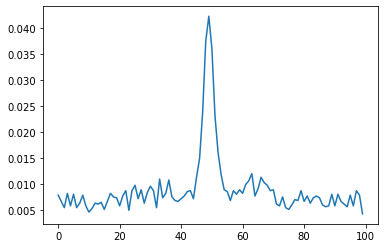

In [349]:
plt.plot(np.mean(batch['Rat08-20130713'][1][:,:,0],0))

In [366]:
mask = metadata.Region == 'Pir'

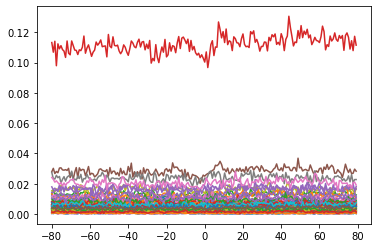

In [367]:
plt.plot(t,np.mean(a,0)[mask].T)

Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


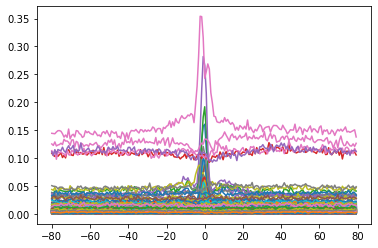

In [328]:
neurons,metadata = bk.load.loadSpikeData(bk.load.path)
ripples = load_ripples()
ripples = ripples['peak'].as_units('s').index.values
binSize = 0.01
t,b = bk.compute.binSpikes(neurons,binSize)
a,t = basefunction.vBaseFunctions3.triggeredAverage(b,(ripples/binSize).astype('int'),taLen = 200,average=False)


ValueError: cannot select an axis to squeeze out which has size not equal to one

In [20]:
batch = bk.load.batch(ripple_psth)

Batch finished in 10029.245937347412
Some session were not processed correctly
['Rat08-20130708', 'Rat08-20130709', 'Rat08-20130712', 'Rat08-20130716', 'Rat08-20130718', 'Rat08-20130719', 'Rat08-20130720', 'Rat08-20130722', 'Rat09-20140324', 'Rat09-20140325', 'Rat09-20140326', 'Rat09-20140327', 'Rat09-20140328', 'Rat09-20140329', 'Rat09-20140331', 'Rat09-20140401', 'Rat09-20140402', 'Rat09-20140403', 'Rat09-20140404', 'Rat09-20140405', 'Rat09-20140407', 'Rat09-20140408', 'Rat09-20140409', 'Rat10-20140629', 'Rat10-20140704', 'Rat10-20140707', 'Rat10-20140708', 'Rat11-20150315', 'Rat11-20150316', 'Rat11-20150402', 'Rat11-20150403']
50.81967213114754 %


In [94]:
batch['Rat08-20130713'][3]

,pInc,pDec,surprise
0,0.000000e+00,1.000000,36.043653
1,1.670886e-13,1.000000,29.418924
2,0.000000e+00,1.000000,36.043653
3,0.000000e+00,1.000000,36.043653
4,0.000000e+00,1.000000,36.043653
...,...,...,...
247,9.993548e-01,0.000645,-7.345331
248,8.843166e-01,0.115683,-2.033958
249,1.951515e-01,0.804848,1.416878
250,2.487088e-01,0.751291,1.105511


In [56]:
batch['Rat10-20140619'][1][5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [119]:
len(np.mean(batch['Rat08-20130710'][1][5],1))

100

In [278]:
bla_mask = batch['Rat08-20130715'][2].Region == 'Hpc'

In [279]:
batch['Rat08-20130713'][1].shape

(5808, 100, 252)

In [285]:
t = np.linspace(-0.5,0.5,100)

<BarContainer object of 100 artists>

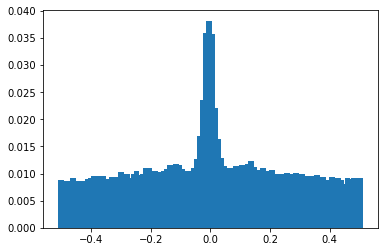

In [287]:
plt.bar(t,np.mean(np.mean(batch['Rat08-20130715'][1][:,:,bla_mask],0),1),0.02
       )

In [12]:
t,peth,metadata1,stats = metadata

NameError: name 'metadata' is not defined

In [125]:
a = pd.concat([metadata1,stats],axis = 1)

In [127]:
import seaborn as sns

In [132]:
sns.scatterplot()

NameError: name 'col' is not defined

In [65]:
states = bk.load.states()
ripples = load_ripples()
states.update({'ripples':nts.IntervalSet(ripples['start'].times(),ripples['stop'].times())})
# d.union(c).drop_short_intervals(1).as_units('s')
states.update({'outside_ripples':states['sws'].set_diff(nts.IntervalSet(states['ripples'].start-200_000,states['ripples'].end+200_000,force_no_fix=True))})


In [67]:
states['outside_ripples'].tot_length()

7644517604.0

In [29]:
%matplotlib qt

(array([0.75856355, 0.95957232, 0.99999569]),
 array([2.41436451e-01, 4.04276820e-02, 4.30950230e-06]),
 array([ -1.14482028,  -3.16697293, -12.35468383]))

In [30]:
s = plt.subplot(2,1,1)
bk.plot.intervals(states['sws'])
plt.subplot(2,1,2,sharex = s)
bk.plot.intervals(states['ripples'],'red')
bk.plot.intervals(states['outside_ripples'],'green')

,start,end
0,0.0,10.0
1,20.0,45.0
2,55.0,70.0


In [ ]:
# rip = states['sws'].intersect(states['ripples'])

In [ ]:
long_rip = states['ripples']

In [16]:
no_rip = states['sws'].set_diff(states['ripples'])

In [19]:
no_rip.as_units('s')

,start,end
0,1447.8000,1448.879200
1,1448.9472,1449.176000
2,1449.2152,1449.322399
3,1449.3584,1450.164000
4,1450.1968,1451.267200
...,...,...
5837,21830.2720,21836.876800
5838,21836.9144,21839.263200
5839,21839.3016,21839.656000
5840,21839.7224,21841.044000


In [161]:
n = neurons[1].restrict(states['sws'])

In [164]:
neurons/states['sws'].tot_length(time_units='s')

0.025843503230437905

252

In [129]:
poissonTest(15,5,5)

(1.0, 5.669857731738041e-26)

In [4]:
# t,spks_bin = bk.compute.binSpikes(neurons)
# binned = nts.TsdFrame(t,spks_bin.T,time_units='s')

In [97]:
import scipy.stats as ss

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [61]:
for i in range(len(metadata[metadata['Region'] == 'Pir'])):
    plt.figure()
    plt.bar(t,np.mean(e,0)[:,metadata.Region == 'Pir'][:,i],width=t[1]-t[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
